In [2]:
import pandas as pd, geopandas as gpd
import time, calendar

In [13]:
def count_fatalities_in_shapefile(filename, fatalities):
    polys = gpd.read_file(f"../shp/{filename}.shp")
    geojson_path = fatalities
    with open(geojson_path, encoding = "utf-8-sig") as geojson_file:
        points = gpd.read_file(geojson_file, driver ="GeoJSON")
        print(len(points))
    pointsInPolygon = gpd.sjoin(points, polys, how="right")
    pointsInPolygon['count']=1
    fatalities_per_region = pointsInPolygon.groupby('name_en').agg({'geometry':'first', 'count':'sum'}).reset_index()
    fatalities_per_region.set_geometry("geometry", crs = "EPSG:4326", inplace = True)
    fatalities_per_region.plot(column="count", figsize=(40,10))
    fatalities_per_region.sort_values(by="count" , ascending = False).head()
    timestamp = calendar.timegm(time.gmtime())

    fatalities_per_region_fn = f"../geolocated_datasets/{timestamp}-{filename}.json"
    output_file = open(fatalities_per_region_fn, "w", encoding="utf-8-sig")
    contents = fatalities_per_region.to_json()
    output_file.write(contents)

13194


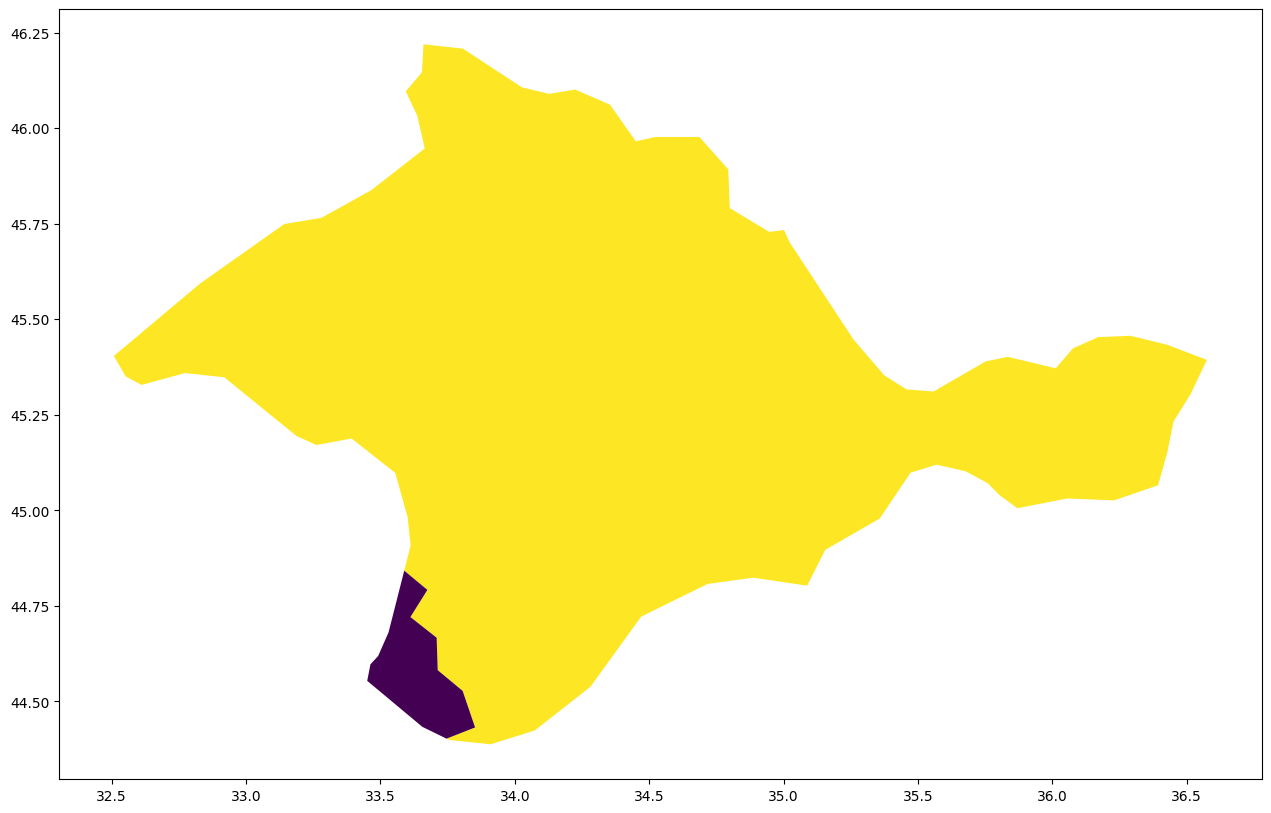

In [6]:
fatalities = "../geolocated_datasets/1686574174-geolocated-@poisk_in_ua.json"
filename = "Crimea"
count_fatalities_in_shapefile(filename, fatalities)

13194
   index_left     id                    location   tag  \
0       12402  21915                   иловайск   city   
0       12633  21595                      донецк  city   
0       12776  21408    бахмут, донецкая область  city   
0       12911  19631  горловка, донецкая область  city   
0       12914  18758  макеевка, донецкая область  city   
0       12924  17888                      донецк  city   
0       12927  17290                      донецк  city   
0       12945  15084   снежное, донецкая область  city   
0       12952  14578  ждановка, донецкая область  city   
0       12956  13802  макеевка, донецкая область  city   

                       date   _latitude  _longitude  \
0 2023-05-12 07:50:47+00:00  47.9248328  38.1976205   
0 2023-05-08 18:00:00+00:00  48.0158753  37.8013407   
0 2023-05-05 14:00:00+00:00  48.5894123  38.0020994   
0 2023-04-11 06:30:00+00:00  48.3058686  38.0027664   
0 2023-04-02 16:21:58+00:00  48.0448144  37.9635093   
0 2023-03-25 06:40:29+00:

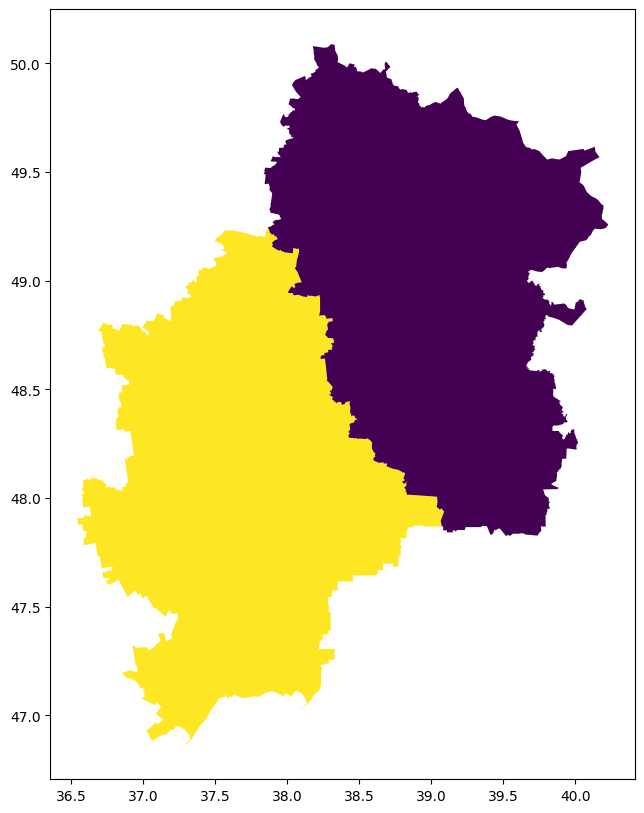

In [15]:
filename = "Donbas"
count_fatalities_in_shapefile(filename, fatalities)